### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

### Reading the training and testing dataset files

In [2]:
X_train = pd.read_csv('../Data/X_Training_Can.csv')
X_test = pd.read_csv('../Data/X_Testing_Can.csv')

y_train = pd.read_csv('../Data/y_Training_Can.csv')
y_test = pd.read_csv('../Data/y_Testing_Can.csv')

### Features to keep

In [3]:
# feat2keep = ['longitude', 'beds', 'baths', 'sq_feet' ,'lease_term_6 months',
#  'lease_term_Negotiable' ,'lease_term_Short Term', 'type_Basement',
#  'type_Condo Unit' ,'type_House','type_Room For Rent', 'type_Townhouse',
#  'smoking_Smoking Allowed' ,'province_British Columbia', 'province_Manitoba',
#  'province_Newfoundland and Labrador' ,'province_Nova Scotia',
#  'province_Ontario', 'province_Quebec', 'province_Saskatchewan']

# feat2keep = ['longitude', 'beds', 'baths', 'sq_feet', 'lease_term_6 months',
#  'lease_term_Short Term' ,'type_Basement' ,'type_House' ,'type_Room For Rent',
#  'province_British Columbia' ,'province_Manitoba',
#  'province_Newfoundland and Labrador' ,'province_Ontario', 'province_Quebec',
#  'province_Saskatchewan']

# feat2keep = ['longitude' ,'sq_feet', 'type_Basement' ,'type_Room For Rent',
#  'province_Manitoba']
# feat2keep = ['baths','beds','type_House','province_Ontario'	,'longitude',
# 'sq_feet','province_Manitoba','province_Saskatchewan',
# 'type_Basement','type_Room For Rent','latitude', 'lease_term_6 months',
#             'lease_term_Short Term', 'province_Northwest Territories',
#             'cats','dogs']


feat2keep = ['baths','beds','type_House','province_Ontario'	,'longitude',
'sq_feet','province_Saskatchewan',
'type_Basement','type_Room For Rent','latitude', ]

X_train = X_train[feat2keep]
X_test = X_test[feat2keep]

<Figure size 2000x2000 with 0 Axes>

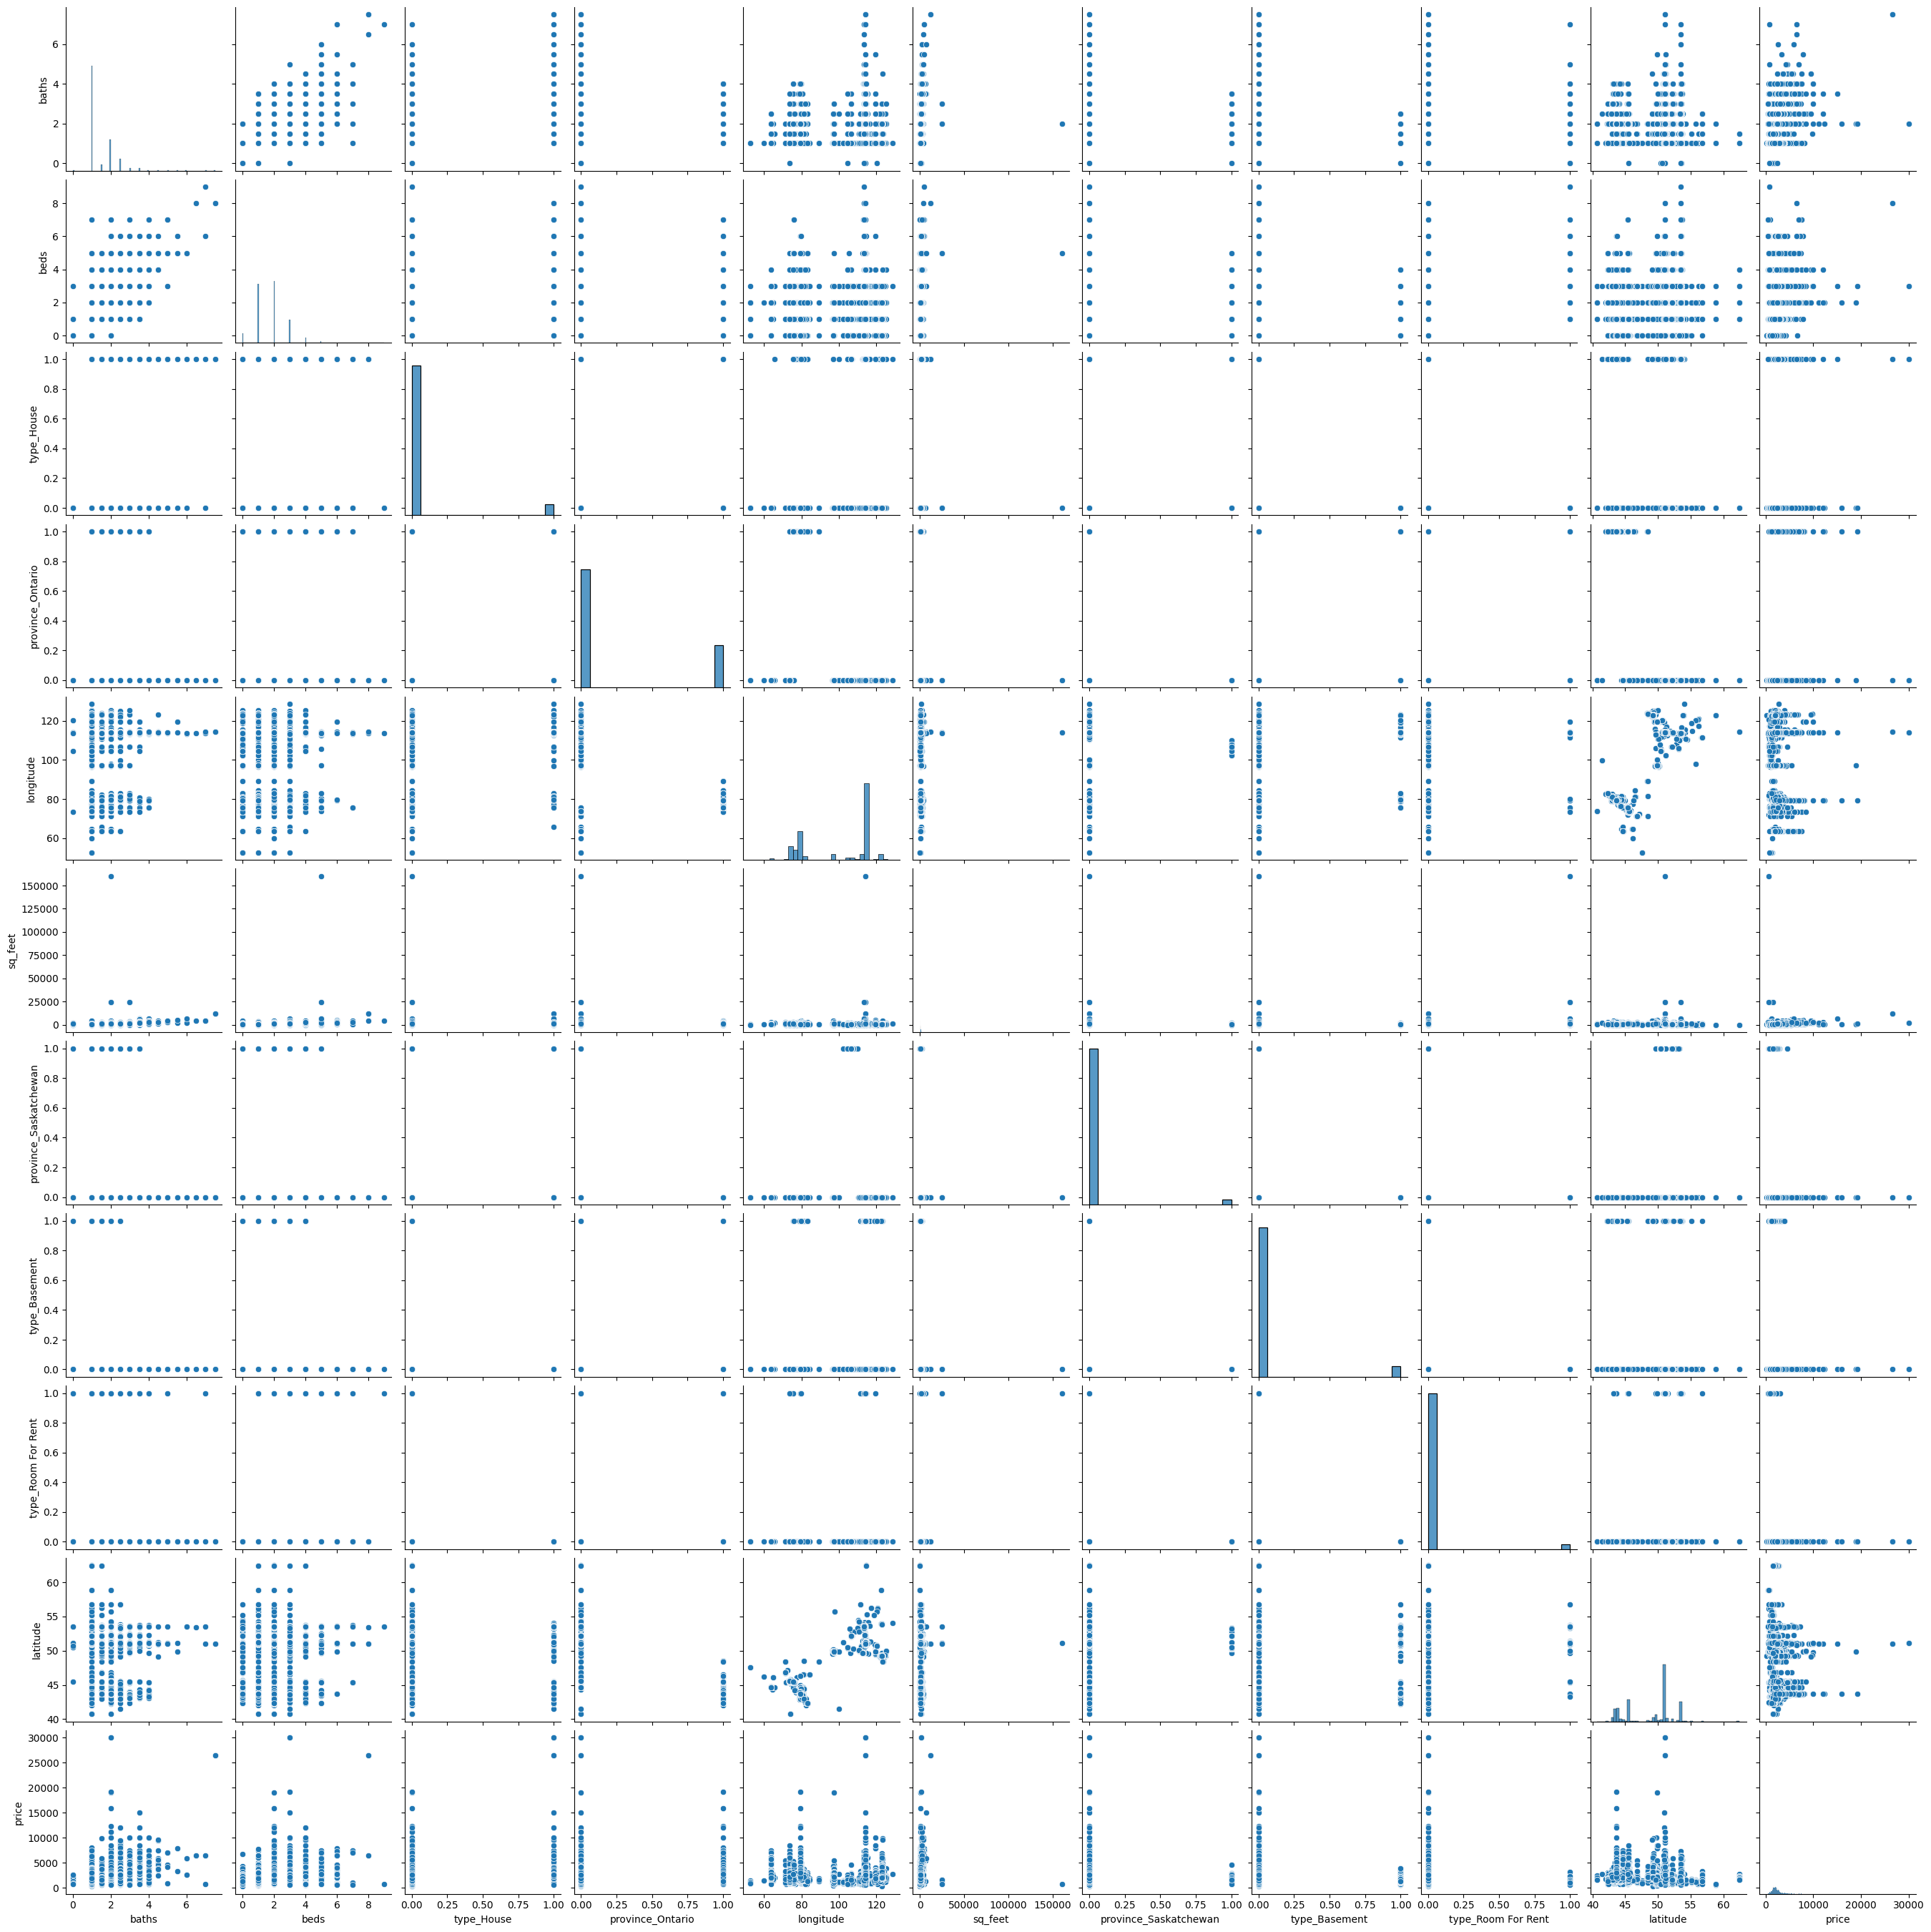

In [4]:
# Investigate the correlation to determine most valuable columns for prediction
# Create plot and adjust its size
plt.figure( figsize=(20, 20))

# Create paired plot
ax = sns.pairplot(X_train.join(y_train))

# Saving the plot t be able to zoom in
plt.savefig('../Graph/SLR_paiplot_train.png')

# Show plot
plt.show()

### Data scaling

In [5]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit-transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform only on test data
X_test_scaled = scaler.transform(X_test)

### Train the model on training dataset

In [6]:
# Create instance of model
slr_model = LinearRegression()

# Train model
slr_model.fit(X_train_scaled, y_train)

LinearRegression()

### Forecast on testing dataset

In [7]:
# Obtain predicted y values
y_pred = slr_model.predict(X_test_scaled)

### Evaluate the model

In [8]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.0f}\n\
The R2 scores = {r2:.0f}')

The Mean Absolute Error = 391
The Mean Square Error = 375721
The Root Mean Square Error = 613
The R2 scores = 1



| Regression Method   | Mean Absolute Error | Mean Square Error    | Root Mean Square Error | R2 scores   |
| ------------------- | ------------------- | -------------------- | ---------------------- | ----------- |
| Linear              | 391                | 375721             | 613                   | 1           |
| Polynomial          | 2596                | 19449989             | 4410                   | 1           |

The errors (Mean Absolute, Mean Square and Root Mean Square) are all lower for the polynomial regression model than the linear regression model. A lower error is an indication that the prediction values are closer to the true value. 

** Conclusion ** </br>
The model built from a polynomial regression with an order of 2 performs better than the linear regression model, since its predicted values are closer to the true values.


### Look at the coefficients

In [9]:
coeff_df = pd.DataFrame(slr_model.coef_.reshape(-1,1),X_test.columns,columns=['Coefficient'])
coeff_df.transpose()

,baths,beds,type_House,province_Ontario,longitude,sq_feet,province_Saskatchewan,type_Basement,type_Room For Rent,latitude
Coefficient,342.024476,188.106132,35.461164,7.835045,293.455431,30.264772,-62.639836,-83.96658,-213.752091,-551.33544


### Plot the residuals

In [10]:
# Create figure and adjust size
plt.figure(figsize = (8, 8))

# Add scatter plot
ax = sns.scatterplot(x=, y=y_test, zorder=3)

# Add scatter plot
#ax = sns.scatterplot(x=X_test, y=y_pred, zorder=3)


SyntaxError: expected argument value expression (177150209.py, line 5)

In [ ]:
X_test